In [1]:
# data_20

In [338]:
import os
import sys
import time
import warnings
import platform
from datetime import datetime,timedelta

# Basic Data Analysis Tools
import numpy as np
import pandas as pd

# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# import FinanceDataReader as fdr

# Exploratory Data Analysis (EDA)
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.offline as offline
import plotly.graph_objs as go
import scipy as sp

# Data Preprocessing and Cleansing
from sklearn.preprocessing import LabelEncoder
from scipy.integrate import quad

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer

# Train / Test Dataset
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Machine Learning Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# from vecstack import stacking

# Hyper Param Optimization
from sklearn.model_selection import GridSearchCV

# testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# from sklearn.externals import joblib 
from dateutil.relativedelta import *
import datetime, time

In [339]:
from sklearn.metrics import accuracy_score

In [340]:
# pd.options.display.max_rows = 999
# pd.options.display.max_columns = 100

In [341]:
# 씨아이에스, 엘앤에프, 이엔에프테크놀로지, 코스모신소재, 피앤이솔루션
company = '엘앤에프'

In [342]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
data = pd.read_csv('data_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,6620.0,41955.0,21035.0,9745.0,-195.0,-1.96,454044.0,1148.31,10.27,0.90,...,-0.073053,-1.0,1.0,-1.0,0.017936,-0.095203,0.989368,0.211175,-0.424009,-0.102817
2015-09-03,6720.0,32943.0,28537.0,10025.0,280.0,2.87,453678.0,1144.66,-3.65,-0.32,...,-0.033593,-1.0,1.0,-1.0,0.059140,-0.075811,0.983854,0.173015,-0.390515,-0.064312
2015-09-04,6590.0,34406.0,44316.0,9785.0,-240.0,-2.39,453630.0,1159.38,14.72,1.29,...,-0.051283,-1.0,1.0,-1.0,-0.006614,-0.151631,0.985965,0.180689,-0.450559,-0.106300
2015-09-07,6540.0,31191.0,17586.0,9810.0,25.0,0.26,451962.0,1147.53,-11.85,-1.02,...,-0.097673,-1.0,1.0,-1.0,0.021594,-0.070602,1.000000,0.161876,-0.442746,-0.116600
2015-09-08,6340.0,26272.0,19887.0,9850.0,40.0,0.41,451356.0,1144.81,-2.72,-0.24,...,-0.056254,-1.0,1.0,-1.0,0.075952,-0.060893,1.000000,0.173937,-0.396206,-0.056553


In [353]:
event_new = pd.read_excel(f"event_embbed_with_tech_no_{company}.xlsx", index_col = 0)
data = data.drop([f'event{i}' for i in range(1, 17)], axis=1)
data = data.reset_index()
data['Date'] = pd.to_datetime(data.Date)
event_new.rename(columns = {'date' : 'Date'}, inplace=True)
data = pd.merge(data, event_new[[f'event{i}' for i in range(1, 17)] + ['Date']], on=['Date'], how='left')
data = data.set_index(['Date'])
data.head()

,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,6620.0,41955.0,21035.0,9745.0,-195.0,-1.96,454044.0,1148.31,10.27,0.90,...,-0.073053,-1.0,1.0,-1.0,0.017936,-0.095203,0.989368,0.211175,-0.424009,-0.102817
2015-09-03,6720.0,32943.0,28537.0,10025.0,280.0,2.87,453678.0,1144.66,-3.65,-0.32,...,-0.033593,-1.0,1.0,-1.0,0.059140,-0.075811,0.983854,0.173015,-0.390515,-0.064312
2015-09-04,6590.0,34406.0,44316.0,9785.0,-240.0,-2.39,453630.0,1159.38,14.72,1.29,...,-0.051283,-1.0,1.0,-1.0,-0.006614,-0.151631,0.985965,0.180689,-0.450559,-0.106300
2015-09-07,6540.0,31191.0,17586.0,9810.0,25.0,0.26,451962.0,1147.53,-11.85,-1.02,...,-0.097673,-1.0,1.0,-1.0,0.021594,-0.070602,1.000000,0.161876,-0.442746,-0.116600
2015-09-08,6340.0,26272.0,19887.0,9850.0,40.0,0.41,451356.0,1144.81,-2.72,-0.24,...,-0.056254,-1.0,1.0,-1.0,0.075952,-0.060893,1.000000,0.173937,-0.396206,-0.056553


In [354]:
pne = ['rate_rolling_10',
 'change_nickel',
 's_niceel_std5',
 '%change_nickel',
 'volumne(week)',
 'volume_brent',
 'stoch_slowk',
 '%change_korean_bond',
 'volume_wti',
 'adx',
 'wti_std5',
 'volumne(mean_5d)(week)',
 '%change_usd_krw',
 'stoch_slowd',
 '%change_wti',
 'usd_krw_std5',
 'rate_rolling_3',
 'm_mineral_std5',
 '%change_kospi_vol',
 'p_nickel_std5',
 'kospi_vol_merge',
 'mineral_std5',
 'ko_bond_std5',
 '%change_brent',
 'kospivol_std5',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [355]:
lnf = ['%change_korean_bond',
 'p_nickel_std5',
 'rate_rolling_150',
 '%change_nickel',
 'stoch_slowd',
 'usd_krw_std5',
 'stoch_slowk',
 'change_nickel',
 'rate_rolling_5',
 'rate_rolling_3',
 'ko_bond_std5',
 'volume_wti',
 'mineral_std5',
 '%change_brent',
 'wti_std5',
 'rate_rolling_30',
 'kospivol_std5',
 'm_mineral_std5',
 's_niceel_std5',
 '%change_kospi_vol',
 'volumne(week)',
 'volume_brent',
 '%change_usd_krw',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [356]:
enf = ['rate_rolling_30',
 'p_nickel_std5',
 'rate_rolling_3',
 'volume_wti',
 'kospivol_std5',
 '%change_usd_krw',
 'mineral_std5',
 'ko_bond_std5',
 'change_nickel',
 'volumne(mean_5d)(week)',
 'volumne(week)',
 'adosc',
 's_niceel_std5',
 'volume_brent',
 'wti_std5',
 'rate_rolling_5',
 '%change_korean_bond',
 '%change_kospi_vol',
 'change_mineral',
 'usd_krw_std5',
 '%change_brent',
 'm_mineral_std5',
 'major_change_mineral',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [357]:
cosmo = ['volumne(week)',
 'wti_std5',
 'change_nickel',
 '%change_kospi_vol',
 'rate_rolling_120',
 '%change_usd_krw',
 'kospivol_std5',
 'rate_rolling_150',
 '%change_wti',
 'volume_brent',
 'ko_bond_std5',
 'm_mineral_std5',
 'brent_std5',
 '%change_korean_bond',
 'mineral_std5',
 'p_nickel_std5',
 '%change_brent',
 'rate_rolling_3',
 's_niceel_std5',
 'kospi_vol_merge',
 'volume_wti',
 'major_change_mineral',
                 'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [358]:
cis = ['kospivol_std5',
 'p_nickel_std5',
 '%change_brent',
 'rate_rolling_10',
 'rate_rolling_30',
 'rate_rolling_3',
 'macd',
 'brent_std5',
 'wti_std5',
 '%change_wti',
 'volume_wti',
 '%change_korean_bond',
 'willr',
 'stoch_slowk',
 '%change_usd_krw',
 'volume_brent',
 'mineral_std5',
 'volumne(mean_5d)(week)',
 'usd_krw_std5',
 '%change_kospi_vol',
 'ko_bond_std5',
 'stoch_slowd',
 'm_mineral_std5',
              'target',
       'profit_rate',
       'adjusted_price',
        'event1', 'event2', 'event3', 'event4', 'event5',
     'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
     'event13', 'event14', 'event15', 'event16']

In [359]:
data = data[lnf]

In [431]:
company = '엘앤에프'
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
data = pd.read_csv('data_{}.csv'.format(company),thousands=',',index_col=0)
# rl_data = pd.read_csv('rl_data.csv',thousands=',',index_col=0)
data.head()

,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,6620.0,41955.0,21035.0,9745.0,-195.0,-1.96,454044.0,1148.31,10.27,0.90,...,-0.073053,-1.0,1.0,-1.0,0.017936,-0.095203,0.989368,0.211175,-0.424009,-0.102817
2015-09-03,6720.0,32943.0,28537.0,10025.0,280.0,2.87,453678.0,1144.66,-3.65,-0.32,...,-0.033593,-1.0,1.0,-1.0,0.059140,-0.075811,0.983854,0.173015,-0.390515,-0.064312
2015-09-04,6590.0,34406.0,44316.0,9785.0,-240.0,-2.39,453630.0,1159.38,14.72,1.29,...,-0.051283,-1.0,1.0,-1.0,-0.006614,-0.151631,0.985965,0.180689,-0.450559,-0.106300
2015-09-07,6540.0,31191.0,17586.0,9810.0,25.0,0.26,451962.0,1147.53,-11.85,-1.02,...,-0.097673,-1.0,1.0,-1.0,0.021594,-0.070602,1.000000,0.161876,-0.442746,-0.116600
2015-09-08,6340.0,26272.0,19887.0,9850.0,40.0,0.41,451356.0,1144.81,-2.72,-0.24,...,-0.056254,-1.0,1.0,-1.0,0.075952,-0.060893,1.000000,0.173937,-0.396206,-0.056553


In [432]:
event_new = pd.read_excel(f"event_embbed_with_tech_no_{company}.xlsx", index_col = 0)
data = data.drop([f'event{i}' for i in range(1, 17)], axis=1)
data = data.reset_index()
data['Date'] = pd.to_datetime(data.Date)
event_new.rename(columns = {'date' : 'Date'}, inplace=True)
data = pd.merge(data, event_new[[f'event{i}' for i in range(1, 17)] + ['Date']], on=['Date'], how='left')
data = data.set_index(['Date'])
data.head()

,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,6620.0,41955.0,21035.0,9745.0,-195.0,-1.96,454044.0,1148.31,10.27,0.90,...,-0.007650,0.018941,0.120704,0.116483,0.132819,0.074534,0.015769,0.082790,0.055652,0.034292
2015-09-03,6720.0,32943.0,28537.0,10025.0,280.0,2.87,453678.0,1144.66,-3.65,-0.32,...,0.095981,0.124944,0.119555,0.108042,0.127290,0.062522,0.009557,0.074797,0.044964,0.026090
2015-09-04,6590.0,34406.0,44316.0,9785.0,-240.0,-2.39,453630.0,1159.38,14.72,1.29,...,0.085359,0.115937,0.264833,0.275743,0.272733,0.218362,0.158821,0.239412,0.194108,0.172969
2015-09-07,6540.0,31191.0,17586.0,9810.0,25.0,0.26,451962.0,1147.53,-11.85,-1.02,...,-0.135959,-0.108072,0.254676,0.257442,0.258751,0.200804,0.159495,0.224511,0.183279,0.173228
2015-09-08,6340.0,26272.0,19887.0,9850.0,40.0,0.41,451356.0,1144.81,-2.72,-0.24,...,-0.002148,0.018951,0.223453,0.233853,0.233761,0.185226,0.132774,0.200884,0.170367,0.156205


In [414]:
data = event_new[[f'event{i}' for i in range(1, 17)]]

Index(['adjusted_price', 'volumne(mean_5d)(week)', 'volumne(week)',
       'price_nickel', 'change_nickel', '%change_nickel', 'stock_nickel',
       'index_mineral', 'change_mineral', '%change_mineral', 'major_mineral',
       'major_change_mineral', 'major_%chagne_mineral', 'price_co_lithum',
       'change_co_lithum', '%change_co_lithum', 'price_cobalt_LME',
       'change_cobalt_LME', '%change_cobalt_LME', 'kospi', 'kosdaq',
       '%change_usd_krw', '%change_korean_bond', '%change_kospi_vol',
       'volume_brent', '%change_brent', 'volume_wti', '%change_wti', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'asset_merge',
       'profit_merge', 'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge',
       'brent_merge', 'wti_merge', 'profit_mean3', 'bren

In [365]:
#case 1 : just fundamental
data = data.drop([f'event{i}' for i in range(1, 17)], axis=1)

KeyError: "['event1' 'event2' 'event3' 'event4' 'event5' 'event6' 'event7' 'event8'\n 'event9' 'event10' 'event11' 'event12' 'event13' 'event14' 'event15'\n 'event16'] not found in axis"

In [295]:
origin.columns

Index(['adjusted_price', 'volumne(mean_5d)(week)', 'volumne(week)',
       'price_nickel', 'change_nickel', '%change_nickel', 'stock_nickel',
       'index_mineral', 'change_mineral', '%change_mineral', 'major_mineral',
       'major_change_mineral', 'major_%chagne_mineral', 'price_co_lithum',
       'change_co_lithum', '%change_co_lithum', 'price_cobalt_LME',
       'change_cobalt_LME', '%change_cobalt_LME', 'kospi', 'kosdaq',
       '%change_usd_krw', '%change_korean_bond', '%change_kospi_vol',
       'volume_brent', '%change_brent', 'volume_wti', '%change_wti', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'target', 'asset_merge',
       'profit_merge', 'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge',
       'brent_merge', 'wti_merge', 'profit_mean3', 'bren

In [316]:
#case 2 : just technical ( event new )
origin = data
origin.index = pd.to_datetime(origin.index)
data = event_new.drop([f'event{i}' for i in range(1, 17)], axis=1)
data['date'] = pd.to_datetime(data.date)
data.rename(columns = {'date' : 'Date'}, inplace=True)
data = pd.merge(origin[['target', 'profit_rate', 'adjusted_price']], data, on = ['Date'], how='left')
data = data.set_index('Date')
data.head()

,target,profit_rate,adjusted_price,rsi_14,macd,cci,adx,stoch_slowk,stoch_slowd,willr,momentum,roc,ema20,adosc,obv
Date,,,,,,,,,,,,,,,
2015-09-02,1,0.298507,6620.0,47.789436,-125.895879,4.758805,20.157598,72.249786,79.209372,-45.070423,10.0,0.151286,6678.012676,-22411.827072,3343158
2015-09-03,-2,-2.370370,6720.0,49.926650,-106.405236,41.521077,19.206760,69.065939,74.184147,-40.375587,150.0,2.283105,6682.011468,-19446.995265,3371695
2015-09-04,-1,-1.208459,6590.0,47.220521,-100.292563,23.483871,18.870205,55.491790,65.602505,-38.378378,740.0,12.649573,6673.248471,-16466.200865,3327379
2015-09-07,-2,-2.009274,6540.0,46.183672,-98.349101,25.788445,18.557689,43.519847,56.025859,-29.677419,560.0,9.364548,6660.558141,-15395.606286,3309793
2015-09-08,0,0.155039,6340.0,42.192797,-111.660075,-5.593261,18.656482,22.604814,40.538817,-37.762238,180.0,2.922078,6630.028794,-19416.999852,3289906


In [247]:
# case 3 : just with event88
data = event_new[[f'event{i}' for i in range(1, 17)]]

In [248]:
# case 4 : just with event16
data = data[[f'event{i}' for i in range(1, 17)]]

NameError: name 'ragne' is not defined

In [395]:
data[:'2018']

,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,%change_mineral,...,brent_std5,wti_std5,p_nickel_std5,s_niceel_std5,mineral_std5,m_mineral_std5,p_coli_std5,kospivol_std5,ko_bond_std5,usd_krw_std5
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-02,6620.0,41955.0,21035.0,9745.0,-195.0,-1.96,454044.0,1148.31,10.27,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-03,6720.0,32943.0,28537.0,10025.0,280.0,2.87,453678.0,1144.66,-3.65,-0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-04,6590.0,34406.0,44316.0,9785.0,-240.0,-2.39,453630.0,1159.38,14.72,1.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-07,6540.0,31191.0,17586.0,9810.0,25.0,0.26,451962.0,1147.53,-11.85,-1.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-08,6340.0,26272.0,19887.0,9850.0,40.0,0.41,451356.0,1144.81,-2.72,-0.24,...,1.008830,0.739523,108.662321,1194.248718,6.057101,7.279334,0.000000,1.189265,0.023989,8.788650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,35800.0,312425.0,453049.0,10785.0,-100.0,-0.92,209052.0,1662.10,10.59,0.64,...,2.169885,1.790958,69.785385,322.049685,6.695870,6.339269,0.273861,0.482967,0.023606,2.353674
2018-12-24,35500.0,304119.0,150328.0,10800.0,15.0,0.14,209202.0,1667.34,5.24,0.32,...,2.156121,1.324104,54.589376,323.861081,6.837124,8.273994,0.547723,0.744448,0.029000,1.332372
2018-12-26,34900.0,364100.0,442670.0,10800.0,15.0,0.14,209202.0,1652.94,-14.40,-0.86,...,1.970220,1.174381,43.789268,224.523494,6.623705,9.166748,0.547723,1.454004,0.029255,1.155550


In [433]:
test_data = data['2019':]
train_data = data['2016':'2018']

train_data = train_data.reset_index()
test_data = test_data.reset_index()

train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

train_data.head()

,Date,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
0,2016-01-04,9680.0,128858.0,166329.0,8515.0,-150.0,-1.73,441342.0,1032.02,0.16,...,0.056947,0.091090,0.114321,0.119334,0.129156,0.078121,0.012715,0.082348,0.055844,0.036427
1,2016-01-05,9780.0,102120.0,65837.0,8620.0,105.0,1.23,441510.0,1021.79,-10.23,...,0.030849,0.052731,0.070876,0.061491,0.085568,0.028944,-0.019770,0.036674,0.017816,-0.003891
2,2016-01-06,9560.0,99753.0,106106.0,8480.0,-140.0,-1.62,440358.0,1016.65,-5.14,...,0.118880,0.148709,0.028350,0.020965,0.041418,-0.015280,-0.067771,-0.011793,-0.032570,-0.044145
3,2016-01-07,9230.0,107521.0,98781.0,8315.0,-165.0,-1.95,438828.0,1012.58,-4.07,...,-0.093427,-0.064781,0.266819,0.271416,0.279179,0.223575,0.173079,0.239830,0.205491,0.184071
4,2016-01-08,9250.0,103229.0,79093.0,8405.0,90.0,1.08,438576.0,1004.72,-7.87,...,0.052387,0.084221,0.247943,0.239379,0.261724,0.203006,0.162038,0.208056,0.185044,0.174085


In [434]:
col = train_data.columns.to_list()

del col[col.index('target')]
# del col[col.index('profit_rate')]

In [435]:
X = train_data[col]
y = train_data['target']

In [436]:
test_X = test_data[col]
test_y = test_data['target']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2019)

In [437]:
train_data

,Date,adjusted_price,volumne(mean_5d)(week),volumne(week),price_nickel,change_nickel,%change_nickel,stock_nickel,index_mineral,change_mineral,...,event7,event8,event9,event10,event11,event12,event13,event14,event15,event16
0,2016-01-04,9680.0,128858.0,166329.0,8515.0,-150.0,-1.73,441342.0,1032.02,0.16,...,0.056947,0.091090,0.114321,0.119334,0.129156,0.078121,0.012715,0.082348,0.055844,0.036427
1,2016-01-05,9780.0,102120.0,65837.0,8620.0,105.0,1.23,441510.0,1021.79,-10.23,...,0.030849,0.052731,0.070876,0.061491,0.085568,0.028944,-0.019770,0.036674,0.017816,-0.003891
2,2016-01-06,9560.0,99753.0,106106.0,8480.0,-140.0,-1.62,440358.0,1016.65,-5.14,...,0.118880,0.148709,0.028350,0.020965,0.041418,-0.015280,-0.067771,-0.011793,-0.032570,-0.044145
3,2016-01-07,9230.0,107521.0,98781.0,8315.0,-165.0,-1.95,438828.0,1012.58,-4.07,...,-0.093427,-0.064781,0.266819,0.271416,0.279179,0.223575,0.173079,0.239830,0.205491,0.184071
4,2016-01-08,9250.0,103229.0,79093.0,8405.0,90.0,1.08,438576.0,1004.72,-7.87,...,0.052387,0.084221,0.247943,0.239379,0.261724,0.203006,0.162038,0.208056,0.185044,0.174085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2018-12-21,35800.0,312425.0,453049.0,10785.0,-100.0,-0.92,209052.0,1662.10,10.59,...,0.225624,0.254005,0.254393,0.264785,0.264468,0.209716,0.166872,0.232043,0.192107,0.175221
729,2018-12-24,35500.0,304119.0,150328.0,10800.0,15.0,0.14,209202.0,1667.34,5.24,...,-0.016589,0.023217,0.279265,0.263364,0.281989,0.222286,0.156970,0.230846,0.194354,0.172734
730,2018-12-26,34900.0,364100.0,442670.0,10800.0,15.0,0.14,209202.0,1652.94,-14.40,...,0.071810,0.097540,0.227184,0.210255,0.235315,0.182721,0.127765,0.188302,0.173142,0.146403
731,2018-12-27,35600.0,316260.0,233576.0,10650.0,-150.0,-1.39,209070.0,1652.94,0.00,...,-0.046123,-0.012388,0.085676,0.096780,0.106287,0.039403,-0.008474,0.065356,0.030375,-0.002698


In [438]:
def cross_validate_with_model(model):

    model_name = type(model).__name__

    print('현재 교차검증 중인 모델 : {}'.format(model_name))

    score = cross_validate(model,
                           X_train.drop('Date', axis=1),
                           y_train,
                           cv=k_fold,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

    mean_score = np.round(np.mean(score['test_score'])*100, 2)
    fit_time_per_cv = np.round(np.mean(score['fit_time']), 2)
    print('Test Mean Score : {}'.format(mean_score))
    print('Fit Time / Each CV : {}s'.format(fit_time_per_cv))
    return model_name, score, mean_score, fit_time_per_cv

In [439]:
k_fold = KFold(n_splits=5,
               shuffle=True,
               random_state=0)

In [440]:
def compare_model_score(model):
    print('학습용 / 검증요 데이터 비교...')
    model.fit(X_train.drop('Date', axis=1), y_train)
    print('학습용 데이터 평가 중...')
    model.score(X_train.drop('Date', axis=1),y_train)
    print('검증용 데이터 평가 중...')
    model.score(X_val.drop('Date', axis=1),y_val)

In [441]:
def show_test_result(y_test, y_pred):
    LINE_LENGHT = 60
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('total result'.upper()))
    print('='*LINE_LENGHT)
    print('{:<10} : {}'.format('RECALL', recall_score(y_test, y_pred)))
    print('{:<10} : {}'.format('PRECISION', precision_score(y_test, y_pred)))
    print('{:<10} : {}'.format('F1 SCORE', f1_score(y_test, y_pred)))
    print('{:<10} : {}'.format('ROC SCORE', roc_auc_score(y_test, y_pred)))
    print('='*LINE_LENGHT)
    print(('{:^%d}' % LINE_LENGHT).format('classification report'.upper()))
    print('='*LINE_LENGHT)
    print(classification_report(y_test, y_pred))# Decision Tree

In [442]:
model_score = dict()

In [443]:
# from sklearn.svm import SVC
# clf = 

In [458]:
# LightGBM
# model_lgbm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                             importance_type='split', lambda_l1=0, lambda_l2=1,
#                             learning_rate=1, max_depth=-1 , min_child_samples=20,
#                             min_child_weight=0.001, min_data_in_leaf=30, min_split_gain=0.0,
#                             n_estimators=100, n_jobs=-1, num_boost_round=1000, num_leaves=31,
#                             objective=None, random_state=None, reg_alpha=0.1, reg_lambda=0.0,
#                             silent=True, subsample=1.0, subsample_for_bin=200000,
#                             subsample_freq=0)

model_lgbm = LGBMClassifier(boosting_type='gbdt',  
                            colsample_bytree=1.0,
                            importance_type='split', 
                            lambda_l1=1.5, lambda_l2=1,
                            learning_rate=0.001, 
                            max_depth=20, 
                            min_child_samples=20,
                            min_child_weight=0.001, 
                            min_data_in_leaf=3,
                            min_sum_hessian_in_leaf = 10,
                            min_split_gain=0.0,
                            n_estimators=700, 
                            n_jobs=-1, 
                            num_boost_round=1000, 
                            num_leaves=45,
                            objective='multiclass', 
                            random_state=100, 
                            reg_alpha=0.1, 
                            reg_lambda=0.0,
                            silent=True,
                            subsample=1.0, 
                            subsample_for_bin=200000,
                            subsample_freq=0,
                            bagging_fraction = 0.5,
                            feature_fraction = 0.5,
                            class_weight = 'balanced')
                           
#sliding -window
# model_name, _, mean_score = sliding_window_validate_with_model(model_lgbm)
# model_score[model_name] = mean_score
# # model_lgbm.fit(X_train.drop('Date', axis=1),y_train)

# cross_valid
model_name, _, mean_score,_ = cross_validate_with_model(model_lgbm)
model_score[model_name] = mean_score
model_lgbm.fit(X_train.drop(['Date', 'profit_rate'], axis=1),y_train)

현재 교차검증 중인 모델 : LGBMClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished
Test Mean Score : 99.66
Fit Time / Each CV : 5.18s


LGBMClassifier(bagging_fraction=0.5, class_weight='balanced',
               feature_fraction=0.5, lambda_l1=1.5, lambda_l2=1,
               learning_rate=0.001, max_depth=20, min_data_in_leaf=3,
               min_sum_hessian_in_leaf=10, n_estimators=700,
               num_boost_round=1000, num_leaves=45, objective='multiclass',
               random_state=100, reg_alpha=0.1)

In [459]:
# Random Forest
model_rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

model_name, _, mean_score, _ = cross_validate_with_model(model_rf)
model_score[model_name] = mean_score
model_rf.fit(X_train.drop(['Date', 'profit_rate'], axis=1),y_train)

현재 교차검증 중인 모델 : RandomForestClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
Test Mean Score : 84.12
Fit Time / Each CV : 2.06s


RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=700, random_state=100)

In [457]:
model_catb = CatBoostClassifier(class_weights=[3, 1, 0.5, 1, 2],random_state=100,n_estimators=500)
model_name, _, mean_score, _ = cross_validate_with_model(model_catb)
model_score[model_name] = mean_score
model_catb.fit(X_train.drop(['Date', 'profit_rate'], axis=1),y_train)

6.6s
113:	learn: 0.5177430	total: 4.89s	remaining: 16.6s
114:	learn: 0.5133731	total: 4.93s	remaining: 16.5s
115:	learn: 0.5098766	total: 4.98s	remaining: 16.5s
116:	learn: 0.5073690	total: 5.03s	remaining: 16.5s
117:	learn: 0.5060182	total: 5.06s	remaining: 16.4s
118:	learn: 0.5008179	total: 5.11s	remaining: 16.4s
119:	learn: 0.4972257	total: 5.15s	remaining: 16.3s
120:	learn: 0.4932873	total: 5.19s	remaining: 16.2s
121:	learn: 0.4896474	total: 5.22s	remaining: 16.2s
122:	learn: 0.4884202	total: 5.27s	remaining: 16.2s
123:	learn: 0.4858918	total: 5.31s	remaining: 16.1s
124:	learn: 0.4816698	total: 5.35s	remaining: 16s
125:	learn: 0.4789190	total: 5.38s	remaining: 16s
126:	learn: 0.4754590	total: 5.42s	remaining: 15.9s
127:	learn: 0.4736175	total: 5.46s	remaining: 15.9s
128:	learn: 0.4708497	total: 5.5s	remaining: 15.8s
129:	learn: 0.4688732	total: 5.54s	remaining: 15.8s
130:	learn: 0.4663658	total: 5.58s	remaining: 15.7s
131:	learn: 0.4632536	total: 5.62s	remaining: 15.7s
132:	learn: 

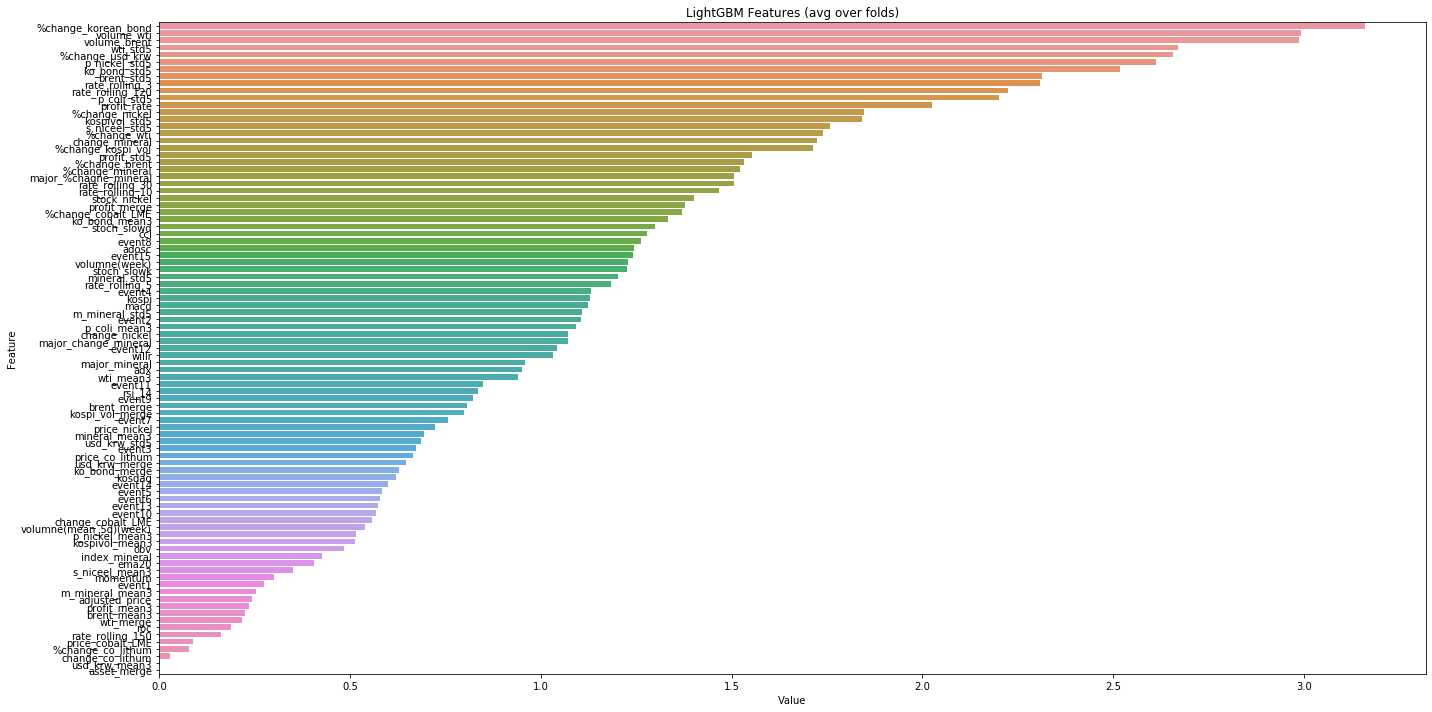

In [460]:
feature_imp = pd.DataFrame(sorted(zip(model_catb.feature_importances_,X_train.drop('Date', axis=1).columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

In [461]:
X_train.columns

Index(['Date', 'adjusted_price', 'volumne(mean_5d)(week)', 'volumne(week)',
       'price_nickel', 'change_nickel', '%change_nickel', 'stock_nickel',
       'index_mineral', 'change_mineral', '%change_mineral', 'major_mineral',
       'major_change_mineral', 'major_%chagne_mineral', 'price_co_lithum',
       'change_co_lithum', '%change_co_lithum', 'price_cobalt_LME',
       'change_cobalt_LME', '%change_cobalt_LME', 'kospi', 'kosdaq',
       '%change_usd_krw', '%change_korean_bond', '%change_kospi_vol',
       'volume_brent', '%change_brent', 'volume_wti', '%change_wti', 'rsi_14',
       'macd', 'cci', 'adx', 'stoch_slowk', 'stoch_slowd', 'willr', 'momentum',
       'roc', 'ema20', 'adosc', 'obv', 'profit_rate', 'rate_rolling_3',
       'rate_rolling_5', 'rate_rolling_10', 'rate_rolling_30',
       'rate_rolling_120', 'rate_rolling_150', 'asset_merge', 'profit_merge',
       'kospi_vol_merge', 'ko_bond_merge', 'usd_krw_merge', 'brent_merge',
       'wti_merge', 'profit_mean3', 'brent_

In [462]:
feature_imp.sort_values(by="Value", ascending=False).iloc[:30].head(10)

,Value,Feature
90,3.160684,%change_korean_bond
89,2.992577,volume_wti
88,2.986192,volume_brent
87,2.669596,wti_std5
86,2.656282,%change_usd_krw
85,2.612982,p_nickel_std5
84,2.518498,ko_bond_std5
83,2.312709,brent_std5
82,2.309318,rate_rolling_3
81,2.224185,rate_rolling_120


In [450]:
from ngboost import NGBClassifier
from ngboost.learners import default_tree_learner
from ngboost.distns import k_categorical
from ngboost.distns.categorical import CategoricalLogScore
cat  = k_categorical(5)
model_ngb = NGBClassifier(Base = default_tree_learner,
                            Dist = cat,
                            Score = CategoricalLogScore,
                            natural_gradient=True,
                            n_estimators = 500,
                            learning_rate=0.1,
                            minibatch_frac=1.0,
                            col_sample=1.0,
                            verbose=True,
                            verbose_eval=100,
                            tol=1e-4,
                            random_state=None
                            )
model_name, _, mean_score,_ = cross_validate_with_model(model_ngb)
model_score[model_name] = mean_score
model_ngb.fit(X_train.drop('Date', axis=1),y_train + 2, X_val = X_val.drop('Date', axis=1), Y_val = y_val + 2)

현재 교차검증 중인 모델 : NGBClassifier
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.8s finished
Test Mean Score : 50.52
Fit Time / Each CV : 18.12s
[iter 0] loss=1.5056 val_loss=1.3255 scale=0.5000 norm=3.0000
[iter 100] loss=0.0000 val_loss=0.1535 scale=2.0000 norm=2.5734
[iter 200] loss=0.0000 val_loss=0.2610 scale=0.0001 norm=0.0001
[iter 300] loss=0.0000 val_loss=0.2610 scale=0.0001 norm=0.0001
[iter 400] loss=0.0000 val_loss=0.2610 scale=0.0001 norm=0.0001


NGBClassifier(Score=<class 'ngboost.distns.categorical.CategoricalLogScore'>,
              learning_rate=0.1,
              random_state=RandomState(MT19937) at 0x21C5685B268)

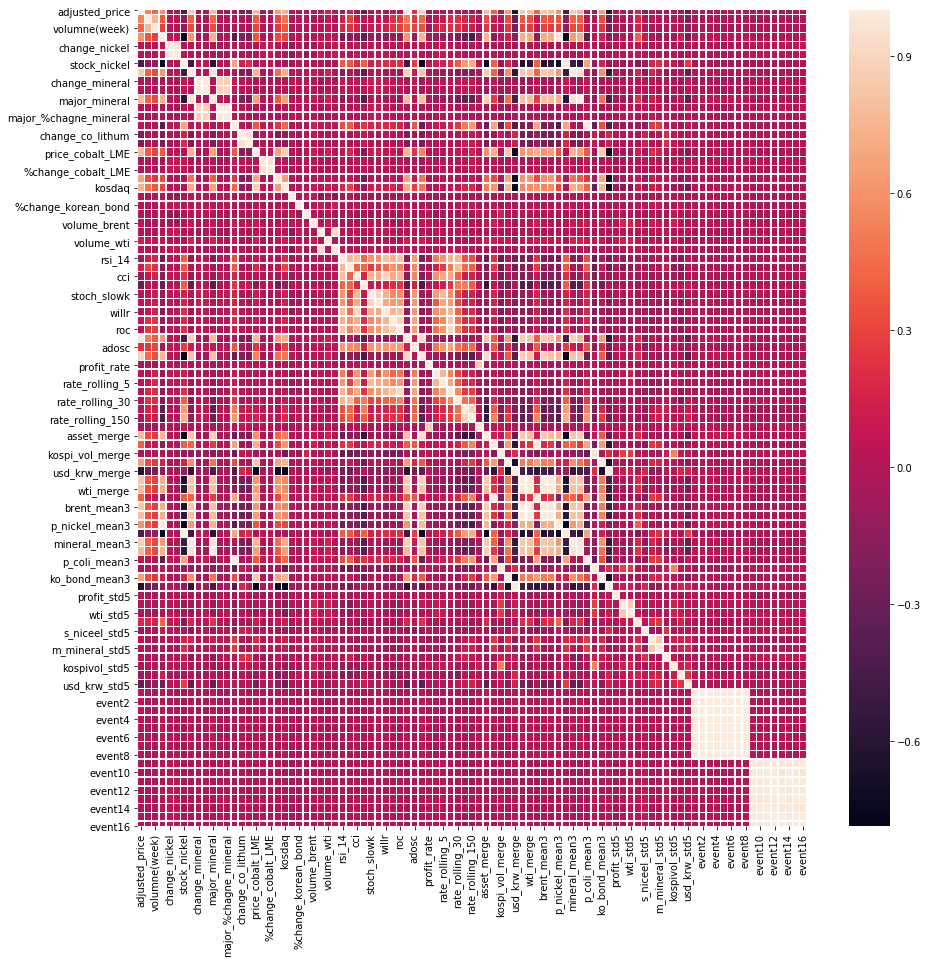

In [485]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), linewidths=.5)
plt.show()

In [480]:
def get_pred_from_model(model):

    result = pd.DataFrame(model.predict_proba(test_X.drop(['Date','profit_rate'], axis=1)), columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    normal_result = pd.DataFrame(columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    normal_result.d2 = result.d2/(result.d2+result.d1+result.u1+result.u2)
    normal_result.d1 = result.d1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.hold = result.hold
    normal_result.u1 = result.u1/(result.d2+result.d1+result.u1+result.u2)
    normal_result.u2 = result.u2/(result.d2+result.d1+result.u1+result.u2)

    profit = pd.DataFrame(test_data.profit_rate.values, columns=['profitrate'])
    _pred = pd.DataFrame(model.predict(test_X.drop(['Date','profit_rate'], axis=1)), columns=['pred'])
    _true = pd.DataFrame(test_data.target.values, columns=['true'])
    test = pd.concat([normal_result, profit, _pred, _true], axis=1)
    
    model.score(test_X.drop(['Date','profit_rate'], axis=1), test_y)

    pred = pd.DataFrame(normal_result,
                        columns=['d2', 'd1', 'hold', 'u1', 'u2'])
    pred['cash'] = 0
    pred['stock'] = 0
    pred['adjusted_price'] = test_X['adjusted_price'].values
    pred['buy_sell']=''

    if pred.iloc[0, 3]+pred.iloc[0, 4] >= 0.6:
        pred.iloc[0, 6] = 100000/pred.iloc[0, 7]
        pred.iloc[0, 5] = 0
    else:
        pred.iloc[0, 5] = 100000
        pred.iloc[0, 6] = 0

    return pred

In [481]:
def backtest1(model,pred, weight,alone=True):

    df = pred.values
   
    # 5:cash
    # 6:stock
    # 7:price
    
    
    s = 1
    while s < len(pred.index):
        i = s
        row = df[s, :]
        x_row = df[s-1, :]
        if row[3]+row[4] >= 0.51:  # buy
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
                df[i, 6] = buy  # stock
                df[i, 5] = 0  # cash
                df[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df[i, 6] = x_row[6]
                df[i, 5] = 0
                df[i, 8] = 'buy'
        elif row[0]+row[1] >= 0.51: # sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7]*(1-0.00313))
                df[i, 5] = sell  # cash
                df[i, 6] = 0  # stock
                df[i, 8] = 'sell'
            else:  # stock ==0
                df[i, 6] = 0
                df[i, 5] = x_row[5]
                df[i, 8] = 'sell'
        else:
                df[i, 5] = x_row[5]
                df[i, 6] = x_row[6]
                df[i, 8] = 'hold'
        s += 1

    backtest_1 = pd.DataFrame(df, columns=pred.columns)
    backtest_1['value'] = backtest_1['cash'] + \
        (backtest_1['stock']*backtest_1['adjusted_price'])
    result_1 = backtest_1
    if alone:
        backtest_1.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 1st Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
#         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest1'))
        plt.show()
    
    return backtest_1

In [482]:
def backtest2(model,pred, weight,alone=True):

    df2 = pred.values
    
    s = 1
    while s < len(pred.index):
        i = s
        row = df2[s, :]
        x_row = df2[s-1, :]
        if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.00:  # buy
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]*(1.00013)) + x_row[6]  # stock
                df2[i, 6] = buy  # stock
                df2[i, 5] = 0  # cash
                df2[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df2[i, 6] = x_row[6]
                df2[i, 5] = 0
                df2[i, 8] = 'buy'
        else: # sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7]*(1-0.00313))
                df2[i, 5] = sell  # cash
                df2[i, 6] = 0  # stock
                df2[i, 8] = 'sell'
            else:  # stock ==0
                df2[i, 6] = 0
                df2[i, 5] = x_row[5]
                df2[i, 8] = 'sell'
            
        s += 1

    backtest_2 = pd.DataFrame(df2, columns=pred.columns)
    backtest_2['value'] = backtest_2['cash'] + \
        (backtest_2['stock']*backtest_2['adjusted_price'])
    result_2 = backtest_2
    if alone:
        backtest_2.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 2nd Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
#         plt.savefig('./img/backtest/{}_{}.png'.format(model_name,'result_backtest2'))
        plt.show()
    return backtest_2

In [483]:
def backtest3(model, pred, weight,alone=True):

    df3 = pred.values

    s = 1

    while s < len(pred.index):
        i = s
        row = df3[s, :]
        x_row = df3[s-1, :]
        if (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) >= 0.3:  # bu3
            if x_row[5] != 0.0:  # cash != 0
                buy = (x_row[5]/row[7]) + x_row[6]  # stock
                df3[i, 6] = buy  # stock
                df3[i, 5] = 0  # cash
                df3[i, 8] = 'buy'
            elif x_row[5] == 0:  # cash ==0
                df3[i, 6] = x_row[6]
                df3[i, 5] = 0
                df3[i, 8] = 'buy'
        elif (weight.u1*row[3]+weight.u2*row[4])-(weight.d1*row[1]+weight.d2*row[0]) <= -0.3:# sell
            if x_row[6] != 0.0:  # stock!= 0
                sell = x_row[6]*(row[7])
                df3[i, 5] = sell  # cash
                df3[i, 6] = 0  # stock
                df3[i, 8] = 'sell'
            else:  # stock ==0
                df3[i, 6] = 0
                df3[i, 5] = x_row[5]
                df3[i, 8] = 'sell'
        else:  #hold
                df3[i, 5] = x_row[5]
                df3[i, 6] = x_row[6]
                df3[i, 8] = 'hold'
        s += 1

    backtest_3 = pd.DataFrame(df3, columns=pred.columns)
    backtest_3['value'] = backtest_3['cash'] + \
        (backtest_3['stock']*backtest_3['adjusted_price'])
    result_3 = backtest_3
    if alone:
        backtest_3.value.plot()

        model_name = type(model).__name__

        plt.title('{} - 3rd Back Test Result'.format(model_name))
        plt.xlabel('Time')
        plt.ylabel('Value')
        os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
        plt.savefig('./output/{}/{}_{}.png'.format(company,model_name,company))
        plt.show()
#     display(backtest_3)
    return backtest_3

----------------------------------------------------------------------------------------------------
LGBMClassifier Score : 0.21138211382113822
----------------------------------------------------------------------------------------------------


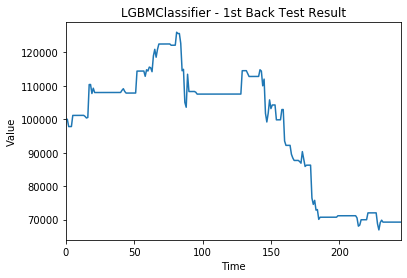

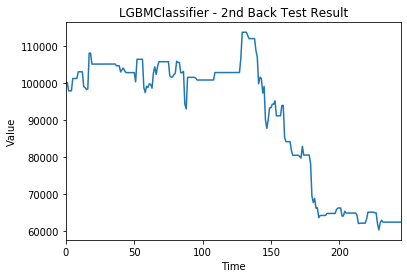

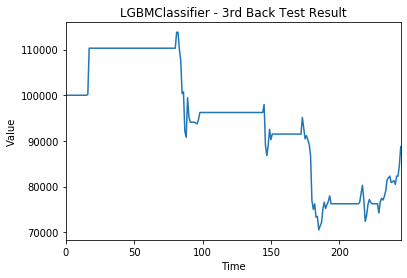

----------------------------------------------------------------------------------------------------
CatBoostClassifier Score : 0.25609756097560976
----------------------------------------------------------------------------------------------------


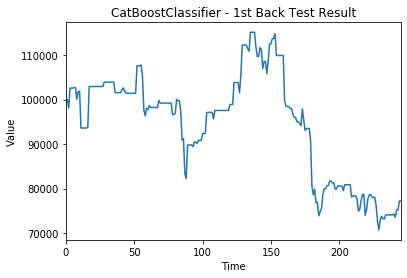

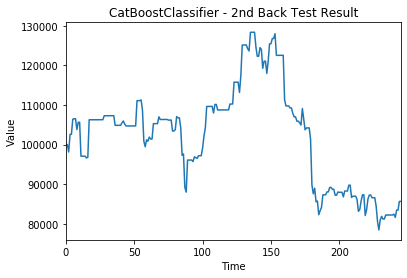

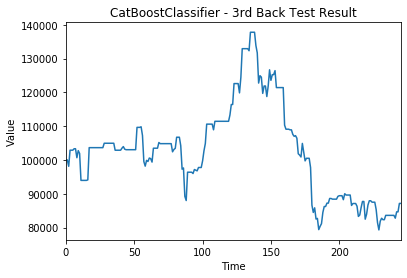

----------------------------------------------------------------------------------------------------


IndexError: index 91 is out of bounds for axis 1 with size 91

In [484]:
# model_name = 'LGBMClassifier'
# # model_lgbm = model_lgbm

# model_name = 'RFClassifier'
# model_rf = model_rf

# model_name = 'CatB Classifier'
# model_catb = model_catb

# model_name = 'XGB Classifier'
# model_xgb = model_xgb

# model_name = 'SoftVoting'
# model_soft_voting = model_soft_voting

# model_name = 'bagginf'
# model = model_bagging
############################################
# print('-'*100)
# # score = model.score(test_X.values,test_y)
# score = model.score(test_X.drop('Date', axis=1).values,test_y)
# print('{} Score : {}'.format(type(model).__name__,score))
# print('-'*100)
# pred = get_pred_from_model(model)

# mean_w = test.describe().loc['mean'].iloc[0:5]
# mean_w
# inv_w = 1/mean_w
# weight = 10*inv_w/inv_w.drop('hold').sum()

for iter_model in [model_lgbm, model_catb, model_ngb]:

    print('-'*100)
    # score = model.score(test_X.values,test_y)
    score = iter_model.score(test_X.drop(['Date', 'profit_rate'], axis=1),test_y)
    print('{} Score : {}'.format(type(iter_model).__name__,score))
    print('-'*100)
    pred = get_pred_from_model(iter_model)
    weight = pd.Series({'d2':3,'d1':2,'hold':1,'u1':2,'u2':3})
#     mean_w = test.describe().loc['mean'].iloc[0:5]
# #     mean_w
#     inv_w = 1/mean_w
#     weight = 10*inv_w/inv_w.drop('hold').sum()
    for func in [backtest1,backtest2,backtest3]:
        func(iter_model,pred ,weight)

In [294]:
# result1 = backtest1(model_lgbm, pred, weight)
# result2 = backtest2(model_lgbm, pred, weight)
weight = pd.Series({'d2':3,'d1':2,'hold':1,'u1':2,'u2':3})
result3 = backtest3(model_rf, get_pred_from_model(model_rf), weight)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [49]:
result3['tomorrow_pct']=result3['adjusted_price'].pct_change().shift(periods=-1)*100

In [50]:
pd.options.display.max_rows=300

In [51]:
result3[['d2','d1','hold','u1','u2','buy_sell','tomorrow_pct','cash','stock','adjusted_price','value']]

,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,cash,stock,adjusted_price,value
0,0.3,0.195238,0.1,0.173016,0.331746,,-0.574713,100000,0,34800,100000
1,0.10192,0.698671,0.0328571,0.0827179,0.116691,sell,-1.878613,100000,0,34600,100000
2,0.2944,0.264,0.107143,0.1248,0.3168,hold,4.860088,100000,0,33950,100000
3,0.728838,0.061693,0.00428571,0.0774749,0.131994,sell,-1.966292,100000,0,35600,100000
4,0.0943396,0.0595065,0.0157143,0.0928882,0.753266,buy,3.724928,0,2.86533,34900,100000
5,0.113372,0.103198,0.0171429,0.700581,0.0828488,buy,0.414365,0,2.86533,36200,103725
6,0.0909091,0.0836941,0.01,0.695527,0.12987,buy,1.650619,0,2.86533,36350,104155
7,0.205793,0.231707,0.0628571,0.22561,0.33689,buy,-2.571042,0,2.86533,36950,105874
8,0.0851689,0.0763583,0.0271429,0.0704846,0.767988,buy,2.083333,0,2.86533,36000,103152
9,0.123547,0.728198,0.0171429,0.0494186,0.0988372,sell,-0.816327,105301,0,36750,105301


In [52]:
check_result = result3[['buy_sell','tomorrow_pct']][1:-1]
check_result.head()

,buy_sell,tomorrow_pct
1,sell,-1.878613
2,hold,4.860088
3,sell,-1.966292
4,buy,3.724928
5,buy,0.414365


In [53]:
def convert_pct(x):
    if x > 0:
        return 'buy'
    else:
        return 'sell'
    
check_result['true'] = check_result['tomorrow_pct'].map(convert_pct)

In [54]:
check_result.shape

(244, 3)

In [55]:
len(check_result[check_result.buy_sell==check_result.true])

181

In [56]:
check_result[check_result.buy_sell!=check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,buy_sell,tomorrow_pct,true
125,hold,-7.612457,sell
140,hold,-6.788079,sell


In [57]:
check_result[check_result.buy_sell==check_result.true][(check_result.tomorrow_pct>5)|(check_result.tomorrow_pct<-5)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,buy_sell,tomorrow_pct,true
10,sell,-7.818930,sell
16,buy,10.140406,buy
51,buy,6.416275,buy
56,sell,-7.188498,sell
84,sell,-6.678082,sell
86,sell,-8.592322,sell
88,buy,9.533469,buy
91,sell,-5.088063,sell
102,buy,5.461394,buy
122,buy,5.321101,buy


In [58]:
result3['true'] = result3['tomorrow_pct'].map(convert_pct)
result3.head()

,d2,d1,hold,u1,u2,cash,stock,adjusted_price,buy_sell,value,tomorrow_pct,true
0,0.3,0.195238,0.1,0.173016,0.331746,100000,0,34800,,100000,-0.574713,sell
1,0.10192,0.698671,0.0328571,0.0827179,0.116691,100000,0,34600,sell,100000,-1.878613,sell
2,0.2944,0.264,0.107143,0.1248,0.3168,100000,0,33950,hold,100000,4.860088,buy
3,0.728838,0.061693,0.00428571,0.0774749,0.131994,100000,0,35600,sell,100000,-1.966292,sell
4,0.0943396,0.0595065,0.0157143,0.0928882,0.753266,0,2.86533,34900,buy,100000,3.724928,buy


In [59]:
result3[(result3.buy_sell!=result3.true)][(result3.tomorrow_pct>5)|(result3.tomorrow_pct<-5)][['d2','d1','hold','u1','u2','buy_sell',
                                                                                                 'tomorrow_pct','true']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,true
125,0.313636,0.215152,0.0571429,0.24697,0.224242,hold,-7.612457,sell
140,0.237261,0.25,0.102857,0.144904,0.367834,hold,-6.788079,sell


In [60]:
result3[(result3.buy_sell==result3.true)][(result3.tomorrow_pct>5)|(result3.tomorrow_pct<-5)][['d2','d1','hold','u1','u2','buy_sell',
                                                                                                 'tomorrow_pct','true']]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,d2,d1,hold,u1,u2,buy_sell,tomorrow_pct,true
10,0.789625,0.0835735,0.00857143,0.054755,0.0720461,sell,-7.818930,sell
16,0.102832,0.123696,0.0414286,0.0536513,0.719821,buy,10.140406,buy
51,0.137628,0.0673499,0.0242857,0.0922401,0.702782,buy,6.416275,buy
56,0.76284,0.0800604,0.0542857,0.0770393,0.0800604,sell,-7.188498,sell
84,0.721574,0.107872,0.02,0.0466472,0.123907,sell,-6.678082,sell
86,0.736296,0.0651852,0.0357143,0.0562963,0.142222,sell,-8.592322,sell
88,0.0917293,0.102256,0.05,0.0571429,0.748872,buy,9.533469,buy
91,0.71657,0.132267,0.0171429,0.0741279,0.0770349,sell,-5.088063,sell
102,0.107195,0.0646109,0.0271429,0.0602056,0.767988,buy,5.461394,buy
122,0.0938416,0.0821114,0.0257143,0.0513196,0.772727,buy,5.321101,buy


In [61]:
# result3[result3.u2>0.9].sort_values(by='tomorrow_pct')

In [62]:
data.columns

Index(['%change_korean_bond', 'p_nickel_std5', 'rate_rolling_150',
       '%change_nickel', 'stoch_slowd', 'usd_krw_std5', 'stoch_slowk',
       'change_nickel', 'rate_rolling_5', 'rate_rolling_3', 'ko_bond_std5',
       'volume_wti', 'mineral_std5', '%change_brent', 'wti_std5',
       'rate_rolling_30', 'kospivol_std5', 'm_mineral_std5', 's_niceel_std5',
       '%change_kospi_vol', 'volumne(week)', 'volume_brent', '%change_usd_krw',
       'target', 'profit_rate', 'adjusted_price', 'event1', 'event2', 'event3',
       'event4', 'event5', 'event6', 'event7', 'event8', 'event9', 'event10',
       'event11', 'event12', 'event13', 'event14', 'event15', 'event16'],
      dtype='object')

In [63]:
col
del col[col.index('Date')]

In [64]:
data[col].columns

Index(['%change_korean_bond', 'p_nickel_std5', 'rate_rolling_150',
       '%change_nickel', 'stoch_slowd', 'usd_krw_std5', 'stoch_slowk',
       'change_nickel', 'rate_rolling_5', 'rate_rolling_3', 'ko_bond_std5',
       'volume_wti', 'mineral_std5', '%change_brent', 'wti_std5',
       'rate_rolling_30', 'kospivol_std5', 'm_mineral_std5', 's_niceel_std5',
       '%change_kospi_vol', 'volumne(week)', 'volume_brent', '%change_usd_krw',
       'adjusted_price', 'event1', 'event2', 'event3', 'event4', 'event5',
       'event6', 'event7', 'event8', 'event9', 'event10', 'event11', 'event12',
       'event13', 'event14', 'event15', 'event16'],
      dtype='object')

In [65]:
len(X_train.columns)

41

# rl_port data

In [66]:
###############################
model = model_rf
#####################################3

In [67]:
data = pd.read_csv('data_{}.csv'.format(company),thousands=',',index_col=0)
profit_rate = data.profit_rate
target =data.target
Date = data.index

In [68]:
data[col].isnull().sum()

%change_korean_bond    0
p_nickel_std5          4
rate_rolling_150       0
%change_nickel         0
stoch_slowd            0
usd_krw_std5           4
stoch_slowk            0
change_nickel          0
rate_rolling_5         0
rate_rolling_3         0
ko_bond_std5           4
volume_wti             0
mineral_std5           4
%change_brent          0
wti_std5               4
rate_rolling_30        0
kospivol_std5          4
m_mineral_std5         4
s_niceel_std5          4
%change_kospi_vol      0
volumne(week)          0
volume_brent           0
%change_usd_krw        0
adjusted_price         0
event1                 0
event2                 0
event3                 0
event4                 0
event5                 0
event6                 0
event7                 0
event8                 0
event9                 0
event10                0
event11                0
event12                0
event13                0
event14                0
event15                0
event16                0


In [69]:
result = pd.DataFrame(model.predict_proba(data[col]),columns=['d2','d1','hold','u1','u2'])
profit = pd.DataFrame(profit_rate.values,columns=['profitrate'])
_pred = pd.DataFrame(model.predict(data[col]),columns=['pred'])
_true = pd.DataFrame(target.values,columns=['true'])
port_data = pd.concat([result,profit,_pred,_true],axis=1)
port_data.index = Date
# rl_data.to_csv('rl_data.csv')
port_data.head(10)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
result = pd.DataFrame(model.predict_proba(X_train.drop('Date', axis=1)),columns=['d2','d1','hold','u1','u2'])
profit = pd.DataFrame(train_data.profit_rate.values,columns=['profitrate'])
_pred = pd.DataFrame(model.predict(X_train.drop('Date', axis=1)),columns=['pred'])
_true = pd.DataFrame(train_data.target,columns=['true'])
train = pd.concat([result,profit,_pred,_true],axis=1)
train.describe()

In [ ]:
def get_index(df):
    mean_w = train.describe().loc['mean'].iloc[0:5]
    inv_w = 1/mean_w
    weight = 10*inv_w/inv_w.drop('hold').sum()
    strategy_index_3 = (weight.u1*df.u1+weight.u2*df.u2)-(weight.d1*df.d1+weight.d2*df.d2)
    df['index_{}'.format(company)] = strategy_index_3

In [ ]:
weight

In [ ]:
def get_index_2(df):
    weight = pd.Series({'d2':3,'d1':2,'hold':1,'u1':2,'u2':3})
    strategy_index_3 = (weight.u1*df.u1+weight.u2*df.u2)-(weight.d1*df.d1+weight.d2*df.d2)
    df['index_2_{}'.format(company)] = strategy_index_3

In [ ]:
get_index(port_data)
get_index_2(port_data)
port_data.head()

In [ ]:
port_data['2019':]

In [ ]:
os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
port_data.to_csv(('./output/port_{}.csv'.format(company)))

In [ ]:
port_data

In [ ]:


# # tech_data.head()

# # rl_all_feature.loc[:,"rsi_14":'obv'].head()

# # roller = rl_all_feature.profit_rate.rolling(10)
# # vol_list = roller.std(ddof=0)
# # rl_all_feature['volatilty_10']= vol_list

# roller = port_data.profitrate.rolling(10)
# vol_list = roller.std(ddof=0)
# port_data['volatility_10'] = vol_list

# rl_feature_2 = pd.merge(port_data,tech_data, how='left', left_index=True, right_index=True)
# rl_feature_2 = pd.merge(rl_feature_2,rl_all_feature[['%change_usd_krw']], how='left', left_index=True, right_index=True)
# rl_feature_2 = pd.merge(rl_feature_2,rl_all_feature.loc[:,"rsi_14":'obv'], how='left', left_index=True, right_index=True)

# # rl_feature_2.head(20)

# # rl_feature_2.columns

# os.chdir(r'G:\공유 드라이브\Boad ADV Stock\2차전지')
# rl_feature_2.to_csv('./output/rl_feature_{}.csv'.format(company))

In [ ]:
print(" 2 mean index : ",port_data[port_data.true==2]['2019':][f'index_{company}'].mean())
print(" 1 mean index : ",port_data[port_data.true==1]['2019':][f'index_{company}'].mean())
print(" 0 mean index : ",port_data[port_data.true==0]['2019':][f'index_{company}'].mean())
print("-1 mean index : ",port_data[port_data.true==-1]['2019':][f'index_{company}'].mean())
print("-2 mean index : ",port_data[port_data.true==-2]['2019':][f'index_{company}'].mean())


In [ ]:
port_data['2019':]

In [ ]:
port_data[port_data.true==-2]['2019':].sort_values('index_2_{}'.format(company),ascending=False)